In [2]:
# from gurobipy import Model, GRB, quicksum

# # Initialize the model
# model = Model("VRPSPD")

# # Define sets
# nodes = [0, 1, 2, 3, 4]  # 0 is the depot
# customer_nodes = [1, 2, 3, 4]  # Excluding depot
# vehicles = [0, 1]  # Two vehicles
# K = len(vehicles)  # Total number of vehicles

# # Example data
# distance = {(i, j): 10 for i in nodes for j in nodes if i != j}  # Dummy distances
# capacity = 100  # Vehicle capacity Q
# pickup = {1: 10, 2: 15, 3: 20, 4: 25}
# delivery = {1: 5, 2: 10, 3: 15, 4: 20}
# M1 = 1000  # Big-M constant for delivery
# M2 = 1000  # Big-M constant for load
# vehicle_cost = 15  # Fixed cost per vehicle used

# # Decision Variables
# x = model.addVars(nodes, nodes, vtype=GRB.BINARY, name="x")
# y = model.addVars(vehicles, vtype=GRB.BINARY, name="y")  # New variable for vehicle usage
# D = model.addVars(nodes, vtype=GRB.CONTINUOUS, name="D")  # Delivery load
# L = model.addVars(nodes, vtype=GRB.CONTINUOUS, name="L")  # Total load

# # Prevent self-loops
# for i in nodes:
#     model.addConstr(x[i, i] == 0, name=f"no_self_loop_{i}")

# # **Constraint 1: Each customer node is left by exactly one vehicle**
# for j in customer_nodes:
#     model.addConstr(quicksum(x[i, j] for i in nodes if i != j) == 1, name=f"leave_once_{j}")

# # **Constraint 2: Each customer node is approached by exactly one vehicle**
# for j in customer_nodes:
#     model.addConstr(quicksum(x[j, i] for i in nodes if i != j) == 1, name=f"approach_once_{j}")

# # **Constraint 3: Link vehicle usage to depot departure**
# for k in vehicles:
#     model.addConstr(quicksum(x[0, i] for i in customer_nodes) <= K * y[k], name=f"vehicle_usage_{k}")

# # **Constraint 4: At end vehicles arrive to the depot**
# model.addConstr(quicksum(x[i, 0] for i in customer_nodes) <= K, name="limit_vehicles_returning_depot")

# # **Constraint 5: Delivery load consistency**
# for i in customer_nodes:
#     for j in customer_nodes:
#         model.addConstr(D[i] >= D[j] + delivery[i] - M1 * (1 - x[i, j]), name=f"delivery_consistency_{i}_{j}")

# # **Constraint 6: Load consistency at customer nodes**
# for j in customer_nodes:
#     model.addConstr(L[j] >= D[j] - delivery[j] + pickup[j], name=f"load_consistency_{j}")

# # **Constraint 7: Load consistency between nodes**
# for i in customer_nodes:
#     for j in customer_nodes:
#         model.addConstr(L[j] >= L[i] - delivery[j] + pickup[j] - M2 * (1 - x[i, j]), name=f"load_transfer_{i}_{j}")

# # **Constraint 8: Delivery demand feasibility**
# for i in customer_nodes:
#     model.addConstr(delivery[i] <= D[i], name=f"delivery_feasibility_lower_{i}")
#     model.addConstr(D[i] <= capacity, name=f"delivery_feasibility_upper_{i}")

# # **Constraint 9: Pickup demand feasibility**
# for i in customer_nodes:
#     model.addConstr(pickup[i] <= L[i], name=f"pickup_feasibility_lower_{i}")
#     model.addConstr(L[i] <= capacity, name=f"pickup_feasibility_upper_{i}")

# # **Constraint 10: Binary constraint for vehicle routing**
# for i in nodes:
#     for j in nodes:
#         model.addConstr(x[i, j] >= 0, name=f"binary_lb_{i}_{j}")
#         model.addConstr(x[i, j] <= 1, name=f"binary_ub_{i}_{j}")

# # **Constraint 11: Non-negativity of load variables**
# for i in nodes:
#     model.addConstr(D[i] >= 0, name=f"non_negative_D_{i}")
#     model.addConstr(L[i] >= 0, name=f"non_negative_L_{i}")

# # **Objective: Minimize total distance + vehicle cost**
# model.setObjective(
#     quicksum(distance[i, j] * x[i, j] for i in nodes for j in nodes if i != j) + quicksum(vehicle_cost * y[k] for k in vehicles),
#     GRB.MINIMIZE
# )

# # Solve Model
# model.optimize()


In [3]:
# from gurobipy import Model, GRB, quicksum

# class VRPSPD:
#     def __init__(self, nodes, customer_nodes, vehicles, distance, capacity, pickup, delivery, M1=1000, M2=1000, vehicle_cost=15):
#         self.nodes = nodes
#         self.customer_nodes = customer_nodes
#         self.vehicles = vehicles
#         self.K = len(vehicles)
#         self.distance = distance
#         self.capacity = capacity
#         self.pickup = pickup
#         self.delivery = delivery
#         self.M1 = sum(self.delivery[i] for i in self.customer_nodes)
#         self.M2 = M2
#         self.vehicle_cost = vehicle_cost
#         self.model = Model("VRPSPD")
#         self._build_model()

#     def _build_model(self):
#         # Decision Variables
#         self.x = self.model.addVars(self.nodes, self.nodes, vtype=GRB.BINARY, name="x")
#         self.y = self.model.addVars(self.vehicles, vtype=GRB.BINARY, name="y")  # Vehicle usage
#         self.D = self.model.addVars(self.nodes, vtype=GRB.CONTINUOUS, name="D")  # current delivery load
#         self.L = self.model.addVars(self.nodes, vtype=GRB.CONTINUOUS, name="L")  # current total load

#         # Constraints
#         for i in self.nodes:
#             self.model.addConstr(self.x[i, i] == 0, name=f"no_self_loop_{i}")

#         for j in self.customer_nodes:
#             self.model.addConstr(quicksum(self.x[i, j] for i in self.nodes if i != j) == 1, name=f"leave_once_{j}")
#             self.model.addConstr(quicksum(self.x[j, i] for i in self.nodes if i != j) == 1, name=f"approach_once_{j}")

#         for k in self.vehicles:
#             self.model.addConstr(quicksum(self.x[0, i] for i in self.customer_nodes) <= self.K * self.y[k], name=f"vehicle_usage_{k}")

#         self.model.addConstr(quicksum(self.x[i, 0] for i in self.customer_nodes) <= self.K, name="limit_vehicles_returning_depot")
        
#         for i in self.customer_nodes:
#             for j in self.customer_nodes:
#                 self.model.addConstr(self.D[i] >= self.D[j] + self.delivery[i] - self.M1 * (1 - self.x[i, j]), name=f"delivery_consistency_{i}_{j}")
#                 #self.model.addConstr(self.D[j] <= self.D[i] - self.delivery[j] + self.M1 * (1 - self.x[i, j]), name=f"delivery_consistency_{i}_{j}")
                

#         for j in self.customer_nodes:
#             self.model.addConstr(self.L[j] >= self.D[j] - self.delivery[j] + self.pickup[j], name=f"load_consistency_{j}")

#         for i in self.customer_nodes:
#             for j in self.customer_nodes:
#                 self.model.addConstr(self.L[j] >= self.L[i] - self.delivery[j] + self.pickup[j] - self.M2 * (1 - self.x[i, j]), name=f"load_transfer_{i}_{j}")

#         for i in self.customer_nodes:
#             self.model.addConstr(self.delivery[i] <= self.D[i], name=f"delivery_feasibility_lower_{i}")
#             self.model.addConstr(self.D[i] <= self.capacity, name=f"delivery_feasibility_upper_{i}")
#             self.model.addConstr(self.pickup[i] <= self.L[i], name=f"pickup_feasibility_lower_{i}")
#             self.model.addConstr(self.L[i] <= self.capacity, name=f"pickup_feasibility_upper_{i}")

#         for i in self.nodes:
#             for j in self.nodes:
#                 self.model.addConstr(self.x[i, j] >= 0, name=f"binary_lb_{i}_{j}")
#                 self.model.addConstr(self.x[i, j] <= 1, name=f"binary_ub_{i}_{j}")


#         for i in self.customer_nodes:
#             for j in self.customer_nodes:
#                 self.model.addConstr(self.D[j] <= self.D[i] + self.M1 * (1 - self.x[i, j]), name=f"delivery_non_increasing_{i}_{j}") #self added 
#         # self.model.addConstr(self.D[0] == quicksum(self.delivery[i] for i in self.customer_nodes), name="depot_delivery_load") #self added to maintain delivery load starts at depot
#         self.model.addConstr(self.D[0] == sum(self.delivery[i] for i in self.customer_nodes), name="depot_delivery_load")
#         for i in self.nodes:
#             self.model.addConstr(self.D[i] >= 0, name=f"non_negative_D_{i}")
#             self.model.addConstr(self.L[i] >= 0, name=f"non_negative_L_{i}")

#         # Objective Function
#         self.model.setObjective(
#             quicksum(self.distance[i, j] * self.x[i, j] for i in self.nodes for j in self.nodes if i != j) +
#             quicksum(self.vehicle_cost * self.y[k] for k in self.vehicles),
#             GRB.MINIMIZE
#         )

#         #for debugging: 
#         for i in self.customer_nodes:
#             self.model.addConstr(self.D[i] >= self.delivery[i], name=f"delivery_min_{i}")

#     def solve(self):
#         self.model.optimize()
#         if self.model.status == GRB.OPTIMAL:
#             return self.get_solution()
#         return None

#     def get_solution(self):
#         solution = {
#             "x": {(i, j): self.x[i, j].x for i in self.nodes for j in self.nodes if self.x[i, j].x > 0.5},
#             "y": {k: self.y[k].x for k in self.vehicles if self.y[k].x > 0.5},
#             "D": {i: self.D[i].x for i in self.nodes},
#             "L": {i: self.L[i].x for i in self.nodes},
#             "objective": self.model.objVal
#         }
#         return solution


In [4]:
from gurobipy import Model, GRB, quicksum

class VRPSPD:
    def __init__(self, nodes, customer_nodes, vehicles, distance, capacity, pickup, delivery, M1=1000, M2=1000, vehicle_cost=15):
        self.nodes = nodes
        self.customer_nodes = customer_nodes
        self.vehicles = vehicles
        self.K = len(vehicles)
        self.distance = distance
        self.capacity = capacity
        self.pickup = pickup
        self.delivery = delivery
        self.M1 = sum(self.delivery[i] for i in self.customer_nodes)  # Tighten big-M value
        self.M2 = M2
        self.vehicle_cost = vehicle_cost
        self.model = Model("VRPSPD")
        self._build_model()

    def _build_model(self):
        # Decision Variables
        self.x = self.model.addVars(self.nodes, self.nodes, vtype=GRB.BINARY, name="x")
        self.y = self.model.addVars(self.vehicles, vtype=GRB.BINARY, name="y")  # Vehicle usage
        self.D = self.model.addVars(self.nodes, vtype=GRB.CONTINUOUS, name="D")  # Delivery load
        self.L = self.model.addVars(self.nodes, vtype=GRB.CONTINUOUS, name="L")  # Total load

        # Constraints
        for i in self.nodes:
            self.model.addConstr(self.x[i, i] == 0, name=f"no_self_loop_{i}")

        # Each customer is visited exactly once
        for j in self.customer_nodes:
            self.model.addConstr(quicksum(self.x[i, j] for i in self.nodes if i != j) == 1, name=f"leave_once_{j}")
            self.model.addConstr(quicksum(self.x[j, i] for i in self.nodes if i != j) == 1, name=f"approach_once_{j}")

        
        # Ensure that no more than K vehicles are used
        self.model.addConstr(quicksum(self.y[k] for k in self.vehicles) <= self.K, name="limit_vehicles")

        # Link vehicle usage to routes
        for k in self.vehicles:
            self.model.addConstr(quicksum(self.x[0, i] for i in self.customer_nodes) <= self.y[k], name=f"vehicle_usage_{k}")

        # Initialize delivery load at the depot
        self.model.addConstr(self.D[0] == sum(self.delivery[i] for i in self.customer_nodes), name="depot_delivery_load")

        # Delivery load consistency and non-increasing constraints
        for i in self.customer_nodes:
            for j in self.customer_nodes:
                self.model.addConstr(self.D[j] <= self.D[i] - self.delivery[j] + self.M1 * (1 - self.x[i, j]), name=f"delivery_consistency_{i}_{j}")
                self.model.addConstr(self.D[j] <= self.D[i] + self.M1 * (1 - self.x[i, j]), name=f"delivery_non_increasing_{i}_{j}")

        # Ensure delivery load is at least the delivery demand at each node
        for i in self.customer_nodes:
            self.model.addConstr(self.D[i] >= self.delivery[i], name=f"delivery_min_{i}")

        # Total load consistency
        for j in self.customer_nodes:
            self.model.addConstr(self.L[j] >= self.D[j] - self.delivery[j] + self.pickup[j], name=f"load_consistency_{j}")

        # Load transfer constraints
        for i in self.customer_nodes:
            for j in self.customer_nodes:
                self.model.addConstr(self.L[j] >= self.L[i] - self.delivery[j] + self.pickup[j] - self.M2 * (1 - self.x[i, j]), name=f"load_transfer_{i}_{j}")

        # Feasibility constraints
        for i in self.customer_nodes:
            self.model.addConstr(self.delivery[i] <= self.D[i], name=f"delivery_feasibility_lower_{i}")
            self.model.addConstr(self.D[i] <= self.capacity, name=f"delivery_feasibility_upper_{i}")
            self.model.addConstr(self.pickup[i] <= self.L[i], name=f"pickup_feasibility_lower_{i}")
            self.model.addConstr(self.L[i] <= self.capacity, name=f"pickup_feasibility_upper_{i}")

        # Non-negativity constraints
        for i in self.nodes:
            self.model.addConstr(self.D[i] >= 0, name=f"non_negative_D_{i}")
            self.model.addConstr(self.L[i] >= 0, name=f"non_negative_L_{i}")

        # Objective Function
        self.model.setObjective(
            quicksum(self.distance[i, j] * self.x[i, j] for i in self.nodes for j in self.nodes if i != j) +
            quicksum(self.vehicle_cost * self.y[k] for k in self.vehicles),
            GRB.MINIMIZE
        )

    def solve(self):
        self.model.optimize()
        if self.model.status == GRB.OPTIMAL:
            return self.get_solution()
        elif self.model.status == GRB.INFEASIBLE:
            print("Model is infeasible. Computing IIS to identify conflicting constraints...")
            self.model.computeIIS()
            self.model.write("model.ilp")
            print("Infeasible constraints written to 'model.ilp'. Review the file to identify conflicts.")
        return None

    def get_solution(self):
        solution = {
            "x": {(i, j): self.x[i, j].x for i in self.nodes for j in self.nodes if self.x[i, j].x > 0.5},
            "y": {k: self.y[k].x for k in self.vehicles if self.y[k].x > 0.5},
            "D": {i: self.D[i].x for i in self.nodes},
            "L": {i: self.L[i].x for i in self.nodes},
            "objective": self.model.objVal
        }
        return solution

In [5]:
# def reconstruct_routes(solution, nodes, customer_nodes):
#     """
#     Reconstructs the routes for each vehicle based on the solution.
#     """
#     # Extract active routes (x[i, j] > 0.5)
#     active_routes = [(i, j) for (i, j), value in solution["x"].items() if value > 0.5]
    
#     # Initialize routes for each vehicle
#     routes = {k: [] for k in range(3)}  # Assuming 3 vehicles
#     vehicle_assignment = {k: 0 for k in range(3)}  # Track which vehicle is assigned to which route
    
#     # Start from the depot (node 0)
#     current_node = 0
#     for k in range(3):  # For each vehicle
#         route = [current_node]  # Start at the depot
#         while True:
#             # Find the next node in the route
#             next_node = None
#             for (i, j) in active_routes:
#                 if i == current_node:
#                     next_node = j
#                     break
#             if next_node is None:
#                 break  # No more nodes in this route
#             route.append(next_node)
#             current_node = next_node
#             if next_node == 0:  # Returned to the depot
#                 break
#         routes[k] = route
#         if len(route) == 1:  # No routes assigned to this vehicle
#             routes[k] = []
    
#     return routes

# def verify_vrpspd(vrp):
#     """
#     Verifies the solution and prints the routes for each vehicle.
#     """
#     solution = vrp.solve()
#     if solution:
#         print("Optimal solution found.")
#         routes = reconstruct_routes(solution, vrp.nodes, vrp.customer_nodes)
#         for k, route in routes.items():
#             if route:
#                 print(f"Vehicle {k} route: {' -> '.join(map(str, route))}")
#             else:
#                 print(f"Vehicle {k} is not used.")
#     else:
#         print("No optimal solution found.")



# # Verify the solution
# def verify_vrpspd(vrp):
#     solution = vrp.solve()
#     if solution:
#         print("Optimal solution found. Active routes:")
#         for (i, j), value in solution["x"].items():
#             if value > 0.5:  # Check if the route is used
#                 print(f"Route from {i} to {j} is used.")
#     else:
#         print("No optimal solution found.")


In [6]:
# Example data
nodes = [0, 1, 2, 3, 4, 5, 6]
customer_nodes = [1, 2, 3, 4, 5, 6]
vehicles = [0, 1, 2]  # 3 vehicles
distance = {(i, j): 10 for i in nodes for j in nodes if i != j}
capacity = 100
pickup = {1: 10, 2: 15, 3: 20, 4: 25, 5:22, 6: 24}
delivery = {1: 5, 2: 10, 3: 15, 4: 20, 5: 12, 6: 15}

# Create and solve the model
vrp = VRPSPD(nodes, customer_nodes, vehicles, distance, capacity, pickup, delivery)
vrp.solve()

# Verify the solution
#verify_vrpspd(vrp)

Set parameter WLSAccessID
Set parameter WLSSecret
Set parameter LicenseID to value 2632106
Academic license 2632106 - for non-commercial use only - registered to a.___@student.tudelft.nl
Gurobi Optimizer version 12.0.1 build v12.0.1rc0 (win64 - Windows 10.0 (19045.2))

CPU model: 12th Gen Intel(R) Core(TM) i7-1255U, instruction set [SSE2|AVX|AVX2]
Thread count: 10 physical cores, 12 logical processors, using up to 12 threads

Academic license 2632106 - for non-commercial use only - registered to a.___@student.tudelft.nl
Optimize a model with 182 rows, 66 columns and 448 nonzeros
Model fingerprint: 0xa86640f7
Variable types: 14 continuous, 52 integer (52 binary)
Coefficient statistics:
  Matrix range     [1e+00, 1e+03]
  Objective range  [1e+01, 2e+01]
  Bounds range     [1e+00, 1e+00]
  RHS range        [1e+00, 1e+03]
Presolve removed 103 rows and 18 columns
Presolve time: 0.00s
Presolved: 79 rows, 48 columns, 481 nonzeros
Variable types: 12 continuous, 36 integer (36 binary)

Root rel

In [7]:
import matplotlib.pyplot as plt 
if vrp.model.status == GRB.OPTIMAL:
    print("\nOptimal Solution Found:")
    for var in vrp.model.getVars():
        print(f"{var.varName}: {var.x}")
    print(f"\nObjective Value: {vrp.model.objVal}")



def plot_loads(solution):
    if solution is None:
        print("No valid solution found.")
        return

    delivery_values = [solution["D"][i] for i in sorted(solution["D"].keys())]
    total_load_values = [solution["L"][i] for i in sorted(solution["L"].keys())]
    nodes = sorted(solution["D"].keys())

    plt.figure(figsize=(10, 5))

    plt.plot(nodes, delivery_values, marker='o', linestyle='-', label="Delivery Load", color='blue')
    plt.plot(nodes, total_load_values, marker='s', linestyle='-', label="Total Load", color='red')

    plt.xlabel("Node")
    plt.ylabel("Load")
    plt.title("Delivery and Total Load per Node")
    plt.legend()
    plt.grid()
    plt.show()


plot_loads(vrp.solve())




Gurobi Optimizer version 12.0.1 build v12.0.1rc0 (win64 - Windows 10.0 (19045.2))

CPU model: 12th Gen Intel(R) Core(TM) i7-1255U, instruction set [SSE2|AVX|AVX2]
Thread count: 10 physical cores, 12 logical processors, using up to 12 threads

Academic license 2632106 - for non-commercial use only - registered to a.___@student.tudelft.nl
Optimize a model with 182 rows, 66 columns and 448 nonzeros
Model fingerprint: 0xa86640f7
Variable types: 14 continuous, 52 integer (52 binary)
Coefficient statistics:
  Matrix range     [1e+00, 1e+03]
  Objective range  [1e+01, 2e+01]
  Bounds range     [1e+00, 1e+00]
  RHS range        [1e+00, 1e+03]
Presolved: 79 rows, 48 columns, 481 nonzeros

Continuing optimization...


Cutting planes:
  Learned: 3
  Gomory: 1
  Implied bound: 13
  MIR: 8
  StrongCG: 1
  RLT: 3
  Relax-and-lift: 4

Explored 1216 nodes (5339 simplex iterations) in 0.02 seconds (0.00 work units)
Thread count was 12 (of 12 available processors)

Solution count 0

Model is infeasible



Distance Matrix:

    0   1   2   3   4
0   X  24  41   8  23
1  24   X  43  20  40
2  41  43   X  20  41
3   8  20  20   X  13
4  23  40  41  13   X
Gurobi Optimizer version 12.0.1 build v12.0.1rc0 (win64 - Windows 10.0 (19045.2))

CPU model: 12th Gen Intel(R) Core(TM) i7-1255U, instruction set [SSE2|AVX|AVX2]
Thread count: 10 physical cores, 12 logical processors, using up to 12 threads

Academic license 2632106 - for non-commercial use only - registered to a.___@student.tudelft.nl
Optimize a model with 62 rows, 35 columns and 137 nonzeros
Model fingerprint: 0x0a8fc8ad
Variable types: 10 continuous, 25 integer (25 binary)
Coefficient statistics:
  Matrix range     [1e+00, 1e+03]
  Objective range  [8e+00, 4e+01]
  Bounds range     [1e+00, 1e+00]
  RHS range        [1e+00, 1e+03]
Found heuristic solution: objective 145.0000000
Presolve removed 29 rows and 11 columns
Presolve time: 0.00s
Presolved: 33 rows, 24 columns, 152 nonzeros
Variable types: 8 continuous, 16 integer (16 binary)


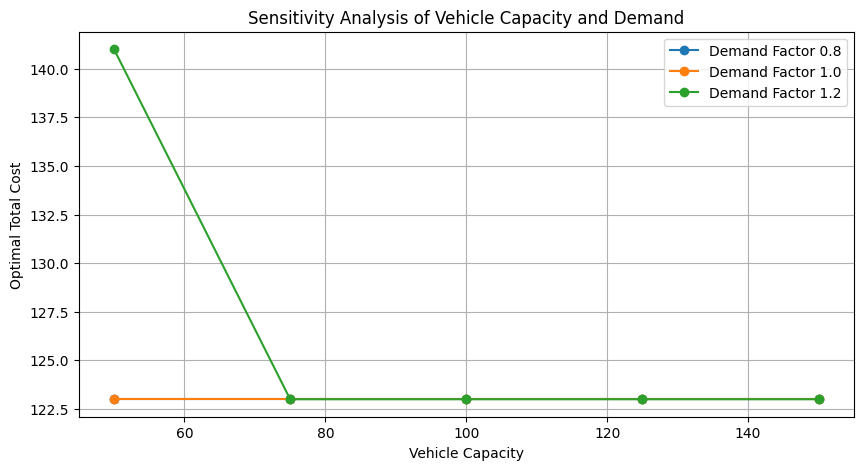

In [8]:
import gurobipy as gp
from gurobipy import GRB, quicksum
import pandas as pd
import matplotlib.pyplot as plt
import random

def run_sensitivity_analysis():
    # Define sets
    nodes = [0, 1, 2, 3, 4]  # 0 is the depot
    customer_nodes = [1, 2, 3, 4]
    vehicles = [0, 1]  # Two vehicles

    # Base Case Data
    base_capacity = 100  # Vehicle capacity
    base_pickup = {1: 10, 2: 15, 3: 20, 4: 25 , 5: 30, 6:35}
    base_delivery = {1: 5, 2: 10, 3: 15, 4: 20 , 5: 25, 6:30}
    distance = {(i, j): random.randint(5, 50) for i in nodes for j in nodes if i != j}
    
    # Make it symmetric
    for i, j in list(distance.keys()):
        distance[j, i] = distance[i, j]

    # Create DataFrame for better display
    distance_matrix = pd.DataFrame(index=nodes, columns=nodes)

    # Fill the matrix
    for i in nodes:
        for j in nodes:
            if i == j:
                distance_matrix.loc[i, j] = "X"  # No self-loops
            else:
                distance_matrix.loc[i, j] = distance[i, j]

    print("\nDistance Matrix:\n")
    print(distance_matrix)


    # Test Scenarios
    capacities = [50, 75, 100, 125, 150]  # Sensitivity on capacity
    demand_factors = [0.8, 1.0, 1.2]  # Sensitivity on pickup & delivery (80%, 100%, 120%)
    
    results = []

    for capacity in capacities:
        for factor in demand_factors:
            # Adjust demand
            pickup = {k: int(base_pickup[k] * factor) for k in base_pickup}
            delivery = {k: int(base_delivery[k] * factor) for k in base_delivery}

            # Initialize the model
            model = gp.Model("VRPSPD_Sensitivity")

            # Decision Variables
            x = model.addVars(nodes, nodes, vtype=GRB.BINARY, name="x")
            D = model.addVars(nodes, vtype=GRB.CONTINUOUS, name="D")
            L = model.addVars(nodes, vtype=GRB.CONTINUOUS, name="L")

            # Constraints
            for i in nodes:
                model.addConstr(x[i, i] == 0, name=f"no_self_loop_{i}")

            for j in customer_nodes:
                model.addConstr(quicksum(x[i, j] for i in nodes if i != j) == 1, name=f"leave_once_{j}")
                model.addConstr(quicksum(x[j, i] for i in nodes if i != j) == 1, name=f"approach_once_{j}")

            model.addConstr(quicksum(x[0, i] for i in customer_nodes) <= len(vehicles), name="limit_vehicles")

            for i in customer_nodes:
                for j in customer_nodes:
                    model.addConstr(D[i] >= D[j] + delivery[i] - 1000 * (1 - x[i, j]), name=f"delivery_consistency_{i}_{j}")
                    model.addConstr(L[j] >= L[i] - delivery[j] + pickup[j] - 1000 * (1 - x[i, j]), name=f"load_transfer_{i}_{j}")

            for i in customer_nodes:
                model.addConstr(delivery[i] <= D[i], name=f"delivery_feasibility_{i}")
                model.addConstr(D[i] <= capacity, name=f"capacity_limit_D_{i}")
                model.addConstr(pickup[i] <= L[i], name=f"pickup_feasibility_{i}")
                model.addConstr(L[i] <= capacity, name=f"capacity_limit_L_{i}")

            # Objective: Minimize total distance
            model.setObjective(quicksum(distance[i, j] * x[i, j] for i in nodes for j in nodes if i != j), GRB.MINIMIZE)

            # Solve Model
            model.optimize()

            # Store Results
            if model.status == GRB.OPTIMAL:
                results.append({
                    "Capacity": capacity,
                    "Demand Factor": factor,
                    "Optimal Cost": model.objVal
                })

    # Convert results to DataFrame
    df_results = pd.DataFrame(results)

    print(df_results)


    # Plot Results
    plt.figure(figsize=(10, 5))
    for factor in demand_factors:
        subset = df_results[df_results["Demand Factor"] == factor]
        plt.plot(subset["Capacity"], subset["Optimal Cost"], marker='o', label=f"Demand Factor {factor}")

    plt.xlabel("Vehicle Capacity")
    plt.ylabel("Optimal Total Cost")
    plt.title("Sensitivity Analysis of Vehicle Capacity and Demand")
    plt.legend()
    plt.grid(True)
    plt.show()

# Run the sensitivity analysis
run_sensitivity_analysis()



Distance Matrix:

    0   1   2   3   4   5   6
0   X  15   9  48  31  24  37
1  15   X  50  27   5   9  35
2   9  50   X  35  49  21   8
3  48  27  35   X  27  50  37
4  31   5  49  27   X  31  42
5  24   9  21  50  31   X  27
6  37  35   8  37  42  27   X
Gurobi Optimizer version 12.0.1 build v12.0.1rc0 (win64 - Windows 10.0 (19045.2))

CPU model: 12th Gen Intel(R) Core(TM) i7-1255U, instruction set [SSE2|AVX|AVX2]
Thread count: 10 physical cores, 12 logical processors, using up to 12 threads

Academic license 2632106 - for non-commercial use only - registered to a.___@student.tudelft.nl
Optimize a model with 116 rows, 63 columns and 301 nonzeros
Model fingerprint: 0xe8a0e661
Variable types: 14 continuous, 49 integer (49 binary)
Coefficient statistics:
  Matrix range     [1e+00, 1e+03]
  Objective range  [5e+00, 5e+01]
  Bounds range     [1e+00, 1e+00]
  RHS range        [1e+00, 1e+03]
Presolve removed 43 rows and 15 columns
Presolve time: 0.00s
Presolved: 73 rows, 48 columns, 492 n

KeyboardInterrupt: 

Exception ignored in: 'gurobipy._core.logcallbackstub'
Traceback (most recent call last):
  File "C:\Users\Aksha\AppData\Roaming\Python\Python312\site-packages\ipykernel\iostream.py", line 604, in flush
    self.pub_thread.schedule(self._flush)
  File "C:\Users\Aksha\AppData\Roaming\Python\Python312\site-packages\ipykernel\iostream.py", line 267, in schedule
    self._event_pipe.send(b"")
  File "C:\Users\Aksha\AppData\Roaming\Python\Python312\site-packages\zmq\sugar\socket.py", line 707, in send
    return super().send(data, flags=flags, copy=copy, track=track)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "_zmq.py", line 1092, in zmq.backend.cython._zmq.Socket.send
  File "_zmq.py", line 1140, in zmq.backend.cython._zmq.Socket.send
  File "_zmq.py", line 1339, in zmq.backend.cython._zmq._send_copy
  File "_zmq.py", line 160, in zmq.backend.cython._zmq._check_rc
KeyboardInterrupt: 


Variable types: 12 continuous, 36 integer (36 binary)

Root relaxation: objective 1.040000e+02, 41 iterations, 0.00 seconds (0.00 work units)

    Nodes    |    Current Node    |     Objective Bounds      |     Work
 Expl Unexpl |  Obj  Depth IntInf | Incumbent    BestBd   Gap | It/Node Time

     0     0  104.00000    0   12  328.00000  104.00000  68.3%     -    0s
H    0     0                     275.0000000  104.00000  62.2%     -    0s
H    0     0                     208.0000000  104.00000  50.0%     -    0s
H    0     0                     197.0000000  104.00000  47.2%     -    0s
H    0     0                     171.0000000  104.00000  39.2%     -    0s
     0     0  126.93898    0   14  171.00000  126.93898  25.8%     -    0s
     0     0  129.05995    0   14  171.00000  129.05995  24.5%     -    0s
     0     0  141.83599    0   16  171.00000  141.83599  17.1%     -    0s
     0     0  147.00000    0   16  171.00000  147.00000  14.0%     -    0s
     0     0  147.00000    0   

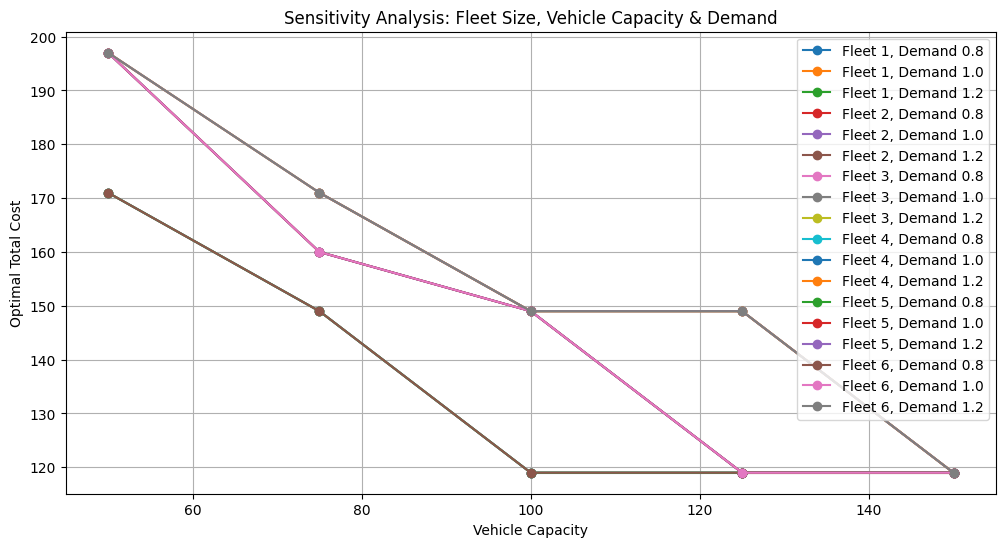

In [9]:
import gurobipy as gp
from gurobipy import GRB, quicksum
import pandas as pd
import matplotlib.pyplot as plt
import random

def extended_sensitivity_analysis():
    # Define sets
    nodes = [0, 1, 2, 3, 4 ,5 ,6]  # 0 is the depot
    customer_nodes = [1, 2, 3, 4 ,5 ,6]

    # Base Case Data
    base_capacity = 100  # Vehicle capacity
    base_pickup = {1: 10, 2: 15, 3: 20, 4: 25, 5: 30, 6: 35}
    base_delivery = {1: 5, 2: 10, 3: 15, 4: 20, 5: 25, 6: 30}
    #distance = {(i, j): 10 for i in nodes for j in nodes if i != j}
    distance = {(i, j): random.randint(5, 50) for i in nodes for j in nodes if i != j}

    # Make it symmetric
    for i, j in list(distance.keys()):
        distance[j, i] = distance[i, j]

    # Create DataFrame for better display
    distance_matrix = pd.DataFrame(index=nodes, columns=nodes)

    # Fill the matrix
    for i in nodes:
        for j in nodes:
            if i == j:
                distance_matrix.loc[i, j] = "X"  # No self-loops
            else:
                distance_matrix.loc[i, j] = distance[i, j]

    print("\nDistance Matrix:\n")
    print(distance_matrix)
    
    # Test Scenarios
    capacities = [50, 75, 100, 125, 150]  # Sensitivity on capacity
    demand_factors = [0.8, 1.0, 1.2]  # Sensitivity on demand
    fleet_sizes = [1, 2, 3, 4, 5,6]  # Number of vehicles available

    results = []

    for K in fleet_sizes:
        for capacity in capacities:
            for factor in demand_factors:
                # Adjust demand
                pickup = {k: int(base_pickup[k] * factor) for k in base_pickup}
                delivery = {k: int(base_delivery[k] * factor) for k in base_delivery}

                if capacity < max(delivery.values()) or capacity < max(pickup.values()):
                    continue

                # Initialize the model
                model = gp.Model("VRPSPD_Fleet_Sensitivity")

                # Decision Variables
                x = model.addVars(nodes, nodes, vtype=GRB.BINARY, name="x")
                D = model.addVars(nodes, vtype=GRB.CONTINUOUS, name="D")
                L = model.addVars(nodes, vtype=GRB.CONTINUOUS, name="L")

                # Constraints
                for i in nodes:
                    model.addConstr(x[i, i] == 0, name=f"no_self_loop_{i}")

                for j in customer_nodes:
                    model.addConstr(quicksum(x[i, j] for i in nodes if i != j) == 1, name=f"leave_once_{j}")
                    model.addConstr(quicksum(x[j, i] for i in nodes if i != j) == 1, name=f"approach_once_{j}")

                model.addConstr(quicksum(x[0, i] for i in customer_nodes) <= K, name="limit_vehicles")

                for i in customer_nodes:
                    for j in customer_nodes:
                        model.addConstr(D[i] >= D[j] + delivery[i] - 1000 * (1 - x[i, j]), name=f"delivery_consistency_{i}_{j}")
                        model.addConstr(L[j] >= L[i] - delivery[j] + pickup[j] - 1000 * (1 - x[i, j]), name=f"load_transfer_{i}_{j}")

                for i in customer_nodes:
                    model.addConstr(delivery[i] <= D[i], name=f"delivery_feasibility_{i}")
                    model.addConstr(D[i] <= capacity, name=f"capacity_limit_D_{i}")
                    model.addConstr(pickup[i] <= L[i], name=f"pickup_feasibility_{i}")
                    model.addConstr(L[i] <= capacity, name=f"capacity_limit_L_{i}")

                # Objective: Minimize total distance
                model.setObjective(quicksum(distance[i, j] * x[i, j] for i in nodes for j in nodes if i != j), GRB.MINIMIZE)

                # Solve Model
                model.optimize()

                # Store Results
                if model.status == GRB.OPTIMAL:
                    results.append({
                        "Fleet Size": K,
                        "Capacity": capacity,
                        "Demand Factor": factor,
                        "Optimal Cost": model.objVal
                    })

    # Convert results to DataFrame
    df_results = pd.DataFrame(results)

    df_results.to_csv("sensitivity_analysis_results.csv", index=False)
    print("Results saved to sensitivity_analysis_results.csv")

    # Print table
    print(df_results)

    # Plot Results
    plt.figure(figsize=(12, 6))
    for K in fleet_sizes:
        subset = df_results[df_results["Fleet Size"] == K]
        for factor in demand_factors:
            data = subset[subset["Demand Factor"] == factor]
            plt.plot(data["Capacity"], data["Optimal Cost"], marker='o', linestyle='-', label=f"Fleet {K}, Demand {factor}")

    plt.xlabel("Vehicle Capacity")
    plt.ylabel("Optimal Total Cost")
    plt.title("Sensitivity Analysis: Fleet Size, Vehicle Capacity & Demand")
    plt.legend()
    plt.grid(True)
    plt.show()

# Run the extended sensitivity analysis
extended_sensitivity_analysis()